In [1]:
!pip install pyod

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 5.0 MB/s eta 0:00:0000:0100:01


In [1]:
import sys
sys.path.append("..") # Not great 
from benchmark import *
from python.creation import barplot
sys.path.append("")
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import evaluate_print
import numpy as np
from sklearn.metrics import roc_auc_score, recall_score
import matplotlib.pyplot as plt
from pyod.models.vae import VAE
from pyod.models.deep_svdd import DeepSVDD
from pyod.models.ae1svm import AE1SVM
from pyod.models.knn import KNN
from pyod.models.anogan import AnoGAN
 

In [2]:
filenames = list_all_file_name_in_folder("../../data_rapport")
datasets = csv_data_into_bunch(filenames)
speech = datasets[0]
cancer = datasets[1]
fraude = datasets[4]
print(filenames)

['../../data_rapport/speech.csv', '../../data_rapport/cancerS.csv', '../../data_rapport/donneurs.csv', '../../data_rapport/satellite.csv', '../../data_rapport/fraude.csv', '../../data_rapport/http.csv', '../../data_rapport/shuttle.csv']


### AutoEncoder

In [3]:
print(type(speech))
print(speech.data.shape)
print(fraude.data.shape)
print(speech.target)

<class 'sklearn.utils._bunch.Bunch'>
(3686, 400)
(284807, 29)
[1. 1. 1. ... 0. 0. 0.]


In [13]:
def run_autoencoder(bunch, params):
    x, y_ground_truth = bunch.data, bunch.target
    AE = AutoEncoder(**params)

    # Fit + predict 
    start = time.perf_counter()
    AE.fit(x)
    y_pred = AE.predict(x) 
    elapsed = time.perf_counter() - start

    print(type(AE))

    scores = AE.decision_function(x)

    #### Test, not in the real run_autoencoder function 
    evaluate_print('AutoEncoder', y_ground_truth, scores)

    ####

    auc = roc_auc_score(y_ground_truth, scores)
    recall = recall_score(y_ground_truth, y_pred)
    
    return {
        'auc':    auc,
        'recall': recall,
        'time':   elapsed
    }

In [14]:
# Default = epoch_num=10, batch_size=32, lr=0.001, hidden_neuron_list=[64, 32], hidden_activation_name='relu'
# speech 3650 * 400 
tests = [
    {'contamination':0.01, 'random_state': 10},
    {'contamination':0.01, 'random_state': 10,'hidden_neuron_list' :[128, 64, 32] },
    {'contamination':0.01, 'random_state': 10,'hidden_neuron_list' :[256, 128, 64, 32] },
    {'contamination':0.01, 'random_state': 10,'hidden_neuron_list' :[256, 128, 64, 32], 'epoch_num' :20},
    {'contamination':0.01, 'random_state': 10,'hidden_neuron_list' :[256, 128, 64, 32], 'batch_size' :64},
    {'contamination':0.01, 'random_state': 10,'hidden_neuron_list' :[256, 128, 64, 32], 'batch_size' :64 , 'epoch_num' :20},
    {'contamination':0.01, 'random_state': 10,'hidden_neuron_list' :[128, 64, 32], 'batch_size' :64 , 'epoch_num' :100},
    {'contamination':0.01, 'random_state': 10,'hidden_neuron_list' :[256, 128, 64, 32], 'batch_size' :64 , 'epoch_num' :200}
]

for i in tests:
    res = run_autoencoder(speech,i)
    print(res)


Training: 100%|███████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.04it/s]


<class 'pyod.models.auto_encoder.AutoEncoder'>
AutoEncoder ROC:0.4699, precision @ rank n:0.0328
{'auc': np.float64(0.4698564160542679), 'recall': 0.01639344262295082, 'time': 5.652454851000584}


Training: 100%|███████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.84it/s]


<class 'pyod.models.auto_encoder.AutoEncoder'>
AutoEncoder ROC:0.472, precision @ rank n:0.0164
{'auc': np.float64(0.4719954776710006), 'recall': 0.01639344262295082, 'time': 5.719942424999317}


Training: 100%|███████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.41it/s]


<class 'pyod.models.auto_encoder.AutoEncoder'>
AutoEncoder ROC:0.4739, precision @ rank n:0.0164
{'auc': np.float64(0.4739265121537592), 'recall': 0.01639344262295082, 'time': 7.428571648000798}


Training: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.45it/s]


<class 'pyod.models.auto_encoder.AutoEncoder'>
AutoEncoder ROC:0.4721, precision @ rank n:0.0164
{'auc': np.float64(0.4721447145279819), 'recall': 0.01639344262295082, 'time': 14.116311917998246}


Training: 100%|███████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.42it/s]


<class 'pyod.models.auto_encoder.AutoEncoder'>
AutoEncoder ROC:0.4714, precision @ rank n:0.0164
{'auc': np.float64(0.47135330695308086), 'recall': 0.01639344262295082, 'time': 4.378970248000769}


Training: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.45it/s]


<class 'pyod.models.auto_encoder.AutoEncoder'>
AutoEncoder ROC:0.4699, precision @ rank n:0.0164
{'auc': np.float64(0.46994234030525717), 'recall': 0.01639344262295082, 'time': 8.400282393000452}


Training: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:29<00:00,  3.41it/s]


<class 'pyod.models.auto_encoder.AutoEncoder'>
AutoEncoder ROC:0.479, precision @ rank n:0.0164
{'auc': np.float64(0.47897795364612783), 'recall': 0.01639344262295082, 'time': 29.594739235000816}


Training: 100%|█████████████████████████████████████████████████████████████| 200/200 [01:36<00:00,  2.07it/s]


<class 'pyod.models.auto_encoder.AutoEncoder'>
AutoEncoder ROC:0.5007, precision @ rank n:0.0328
{'auc': np.float64(0.5007439231204069), 'recall': 0.03278688524590164, 'time': 96.83583714799897}


In [6]:
# http 620 098 * 29
tests_fraude = [
    {'contamination':0.01, 'random_state': 10},
    {'contamination':0.01, 'random_state': 10,'hidden_neuron_list' :[128, 64, 32] },
    {'contamination':0.01, 'random_state': 10,'hidden_neuron_list' :[256, 128, 64, 32] },
    {'contamination':0.01, 'random_state': 10,'hidden_neuron_list' :[256, 128, 64, 32], 'epoch_num' :20},
    {'contamination':0.01, 'random_state': 10,'hidden_neuron_list' :[256, 128, 64, 32], 'batch_size' :64},
    {'contamination':0.01, 'random_state': 10,'hidden_neuron_list' :[256, 128, 64, 32], 'batch_size' :64 , 'epoch_num' :20},
    {'contamination':0.01, 'random_state': 10,'hidden_neuron_list' :[128, 64, 32], 'batch_size' :64 , 'epoch_num' :100},

]


for i in tests_fraude:
    res = run_autoencoder(fraude,i)
    print(res)


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [03:38<00:00, 21.89s/it]


AutoEncoder ROC:0.9533, precision @ rank n:0.3801
{'auc': np.float64(0.9532757702187928), 'recall': 0.6544715447154471, 'time': 237.7655148039994}


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [05:42<00:00, 34.23s/it]


AutoEncoder ROC:0.9505, precision @ rank n:0.313
{'auc': np.float64(0.9505196486377399), 'recall': 0.6117886178861789, 'time': 360.93116471199755}


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [10:21<00:00, 62.15s/it]


AutoEncoder ROC:0.9513, precision @ rank n:0.3943
{'auc': np.float64(0.9512521787854391), 'recall': 0.6626016260162602, 'time': 643.4552038289985}


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [17:32<00:00, 52.63s/it]


AutoEncoder ROC:0.9522, precision @ rank n:0.3415
{'auc': np.float64(0.952197636910509), 'recall': 0.6483739837398373, 'time': 1081.1407605640015}


Training: 100%|███████████████████████████████████████████████████████████████| 10/10 [04:36<00:00, 27.67s/it]


AutoEncoder ROC:0.9441, precision @ rank n:0.3028
{'auc': np.float64(0.9441231485059869), 'recall': 0.5650406504065041, 'time': 297.86277288400015}


Training: 100%|███████████████████████████████████████████████████████████████| 20/20 [11:30<00:00, 34.51s/it]


AutoEncoder ROC:0.94, precision @ rank n:0.3577
{'auc': np.float64(0.9400395065932968), 'recall': 0.556910569105691, 'time': 708.8273322060013}


Training: 100%|█████████████████████████████████████████████████████████████| 100/100 [31:35<00:00, 18.95s/it]


AutoEncoder ROC:0.9381, precision @ rank n:0.1426
{'auc': np.float64(0.9381175679843252), 'recall': 0.4065040650406504, 'time': 1907.5834561049996}


### Plot test

In [15]:
def run_autoencoder_plot(bunch, params):
    x, y_ground_truth = bunch.data, bunch.target
    AE = AutoEncoder(**params)

    # Fit + predict 
    start = time.perf_counter()
    AE.fit(x)
    y_pred = AE.predict(x) 
    elapsed = time.perf_counter() - start

    scores = AE.decision_function(x)

    #### Test, not in the real run_autoencoder function 
    evaluate_print('AutoEncoder', y_ground_truth, scores)
    scores_proba = AE.predict_proba(x)[:,1]
    plt.figure()
    barplot(scores_proba,y_ground_truth,title='Outlier scores from predict_proba')
    plt.show()

    ####

    auc = roc_auc_score(y_ground_truth, scores)
    recall = recall_score(y_ground_truth, y_pred)
    
    return {
        'auc':    auc,
        'recall': recall,
        'time':   elapsed
    }

Training: 100%|█████████████████████████████████████████████████████████████| 200/200 [01:29<00:00,  2.23it/s]


AutoEncoder ROC:0.5007, precision @ rank n:0.0328
Plot execution time : 2.1202 s


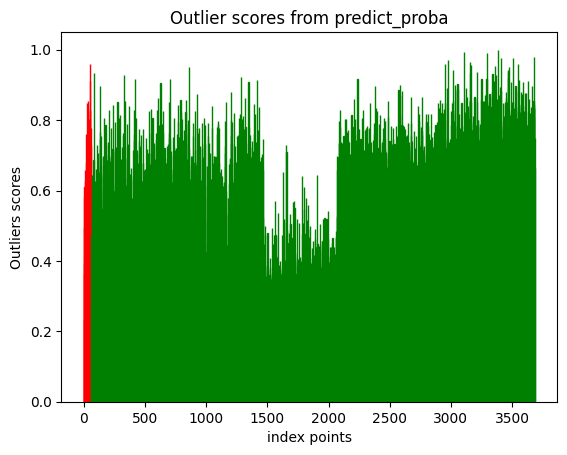

{'auc': np.float64(0.5007439231204069),
 'recall': 0.03278688524590164,
 'time': 90.07660063899857}

In [17]:
run_autoencoder_plot(speech,tests[7])
#run_autoencoder_plot(cancer,tests[7])

### VAE, DeepSVDD, AE1SVM, KNN

In [18]:
def run_vae(bunch, params):
    x, y_ground_truth = bunch.data, bunch.target
    VAE_model = VAE(**params)

    # Fit + predict 
    start = time.perf_counter()
    VAE_model.fit(x)
    y_pred = VAE_model.predict(x)
    elapsed = time.perf_counter() - start

    # metrics
    scores = VAE_model.decision_function(x)
    
    auc = roc_auc_score(y_ground_truth, scores)
    recall = recall_score(y_ground_truth, y_pred)

    return {
        'auc':    auc,
        'recall': recall,
        'time':   elapsed
    }



def run_deepsvdd(bunch, params):
    x, y_ground_truth = bunch.data, bunch.target

    # DeepSVDD have a mandatory parameters, the features numbers of the dataset      <- <- <-
    features = x.shape[1]
    params["n_features"] = features
    
    DS = DeepSVDD(**params)

    # Fit + predict 
    start = time.perf_counter()
    DS.fit(x)
    y_pred = DS.predict(x)
    elapsed = time.perf_counter() - start

    # metrics 
    scores = DS.decision_function(x)
    
    auc = roc_auc_score(y_ground_truth, scores)
    recall = recall_score(y_ground_truth, y_pred)

    return {
        'auc':    auc,
        'recall': recall,
        'time':   elapsed
    }

def run_ae1svm(bunch, params):
    x, y_ground_truth = bunch.data, bunch.target

    AE1SVM_model = AE1SVM(**params)

    # Fit + predict 
    start = time.perf_counter()
    AE1SVM_model.fit(x)
    y_pred = AE1SVM_model.predict(x)
    elapsed = time.perf_counter() - start

    # metrics
    scores = AE1SVM_model.decision_function(x)
    
    auc = roc_auc_score(y_ground_truth, scores)
    recall = recall_score(y_ground_truth, y_pred)

    return {
        'auc':    auc,
        'recall': recall,
        'time':   elapsed
    }

def run_knn(bunch, params):
    x, y_ground_truth = bunch.data, bunch.target
    KNN_model = KNN(**params)

    # Fit + predict 
    start = time.perf_counter()
    KNN_model.fit(x)
    y_pred = KNN_model.predict(x)
    elapsed = time.perf_counter() - start

    # metrics
    scores = KNN_model.decision_function(x)
    
    auc = roc_auc_score(y_ground_truth, scores)
    recall = recall_score(y_ground_truth, y_pred)

    return {
        'auc':    auc,
        'recall': recall,
        'time':   elapsed
    }

In [19]:
algorithms = [
    ("VAE",          run_vae,       {"random_state":10, "preprocessing": False,"epoch_num": 10}),
    ("DeepSVDD",     run_deepsvdd,  {"random_state":10,"preprocessing": False,"epochs": 10}),
    ("AE1SVM",       run_ae1svm,    {"preprocessing": False,"epochs": 10}),
    ("KNN",          run_knn,       {})
    ]


#automatisation(datasets, algorithms)

### AnoGan

In [25]:
def run_anogan(bunch, params):
    x, y_ground_truth = bunch.data, bunch.target
    AG = AnoGAN(**params)

    # Fit + predict
    start = time.perf_counter()
    AG.fit(x)
    y_pred = AG.predict(x)
    elapsed = time.perf_counter() - start
    
    print("fit + predict fini")	
    # metrics
    scores = AG.decision_function(x)

    auc    = roc_auc_score(y_ground_truth, scores)
    recall = recall_score(y_ground_truth, y_pred)

    total_time = time.perf_counter() - start
    print("Total execution time", total_time)
    
    return {
        'auc':    auc,
        'recall': recall,
        'time':   elapsed
    }


In [29]:
algorithms = [
    ("AnoGan", run_anogan, {"preprocessing": False,"epochs": 10}),
    ]
benchmark_dataset_algo([speech,cancer],algorithms)

speech  : départ
   AnoGan : départ
fit + predict fini


NameError: name 'anogan_model' is not defined

### OCSVM

In [3]:
from pyod.models.ocsvm import OCSVM

In [4]:
def run_ocsvm(bunch, params):
    x, y_ground_truth = bunch.data, bunch.target
    OC = OCSVM(**params)

    # Fit + predict
    start = time.perf_counter()
    OC.fit(x)
    y_pred = OC.predict(x)
    elapsed = time.perf_counter() - start
    
    print("fit + predict fini")	
    # metrics
    scores = OC.decision_function(x)

    auc    = roc_auc_score(y_ground_truth, scores)
    recall = recall_score(y_ground_truth, y_pred)

    total_time = time.perf_counter() - start
    print("Total execution time", total_time)
    
    return {
        'auc':    auc,
        'recall': recall,
        'time':   elapsed
    }

In [5]:
algorithms = [
    ("OCSVM", run_ocsvm, {}),
    ]
benchmark_dataset_algo([speech,cancer],algorithms)

speech  : départ
   OCSVM : départ
fit + predict fini
Total execution time 6.376582577999216
AUC : 0.4662521198417185 RAPPEL : 0.11475409836065574 TEMPS : 4.78564579399972
   OCSVM : fini
speech  : fini
cancerS  : départ
   OCSVM : départ
fit + predict fini
Total execution time 0.01668536299985135
AUC : 0.9815126050420168 RAPPEL : 1.0 TEMPS : 0.01083411400031764
   OCSVM : fini
cancerS  : fini


(   dataset     OCSVM
 0   speech  0.466252
 1  cancerS  0.981513,
    dataset     OCSVM
 0   speech  0.114754
 1  cancerS  1.000000,
    dataset     OCSVM
 0   speech  4.785646
 1  cancerS  0.010834)